In [5]:
%matplotlib inline
from matplotlib.pyplot import *

In [6]:
%run bliksem_station_afstand.py

2993 202 2143.85819906 430.0
3133 1006 1729.70712455 550.0
3133 1006 1729.70712455 550.0
3218 4003 8111.97583309 3800.0
3218 4003 8111.97583309 3800.0
3671 21 3511.93763799 440.0
3677 8201 6154.97977317 1100.0
3677 8201 6154.97977317 1100.0
3691 3201 1809.35922544 540.0
3706 3 2697.53825734 460.0
3706 3 2697.53825734 460.0
3717 3201 5707.14401333 770.0
3718 3201 558.175938984 540.0
3718 3201 558.175938984 540.0
3718 3202 366.571768952 540.0
3718 3202 366.571768952 540.0
3719 3202 2134.8326248 530.0
3722 3202 1259.69586158 550.0
3824 3202 1084.39881378 540.0
3835 3202 1836.8789036 540.0
3835 3202 1836.8789036 540.0
3992 8201 5897.08542605 1640.0
4008 7401 4595.38251363 3310.0
4008 7401 4595.38251363 3310.0
4053 3201 4420.40091191 530.0
4102 8201 1377.84841963 620.0
4254 7401 1971.30122117 1260.0
4257 7401 3606.48274211 1280.0
4257 7401 3606.48274211 1280.0
4379 3202 8080.04125132 550.0
4384 3201 3310.99059946 540.0
4389 3201 1900.68005487 540.0
4470 9 458.038438761 950.0
4477 504 1369.1

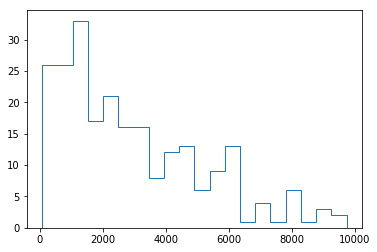

In [7]:
n, bins, patches = hist(distances, bins=20, histtype='step')



In [8]:
R_2 = lambda x: 1/x

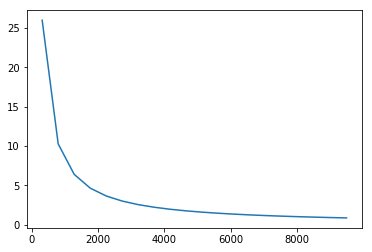

In [9]:
x = (bins[:-1] + bins[1:])/2
y = R_2(x)
y = y / y[0] * n[0]
plot(x,y)

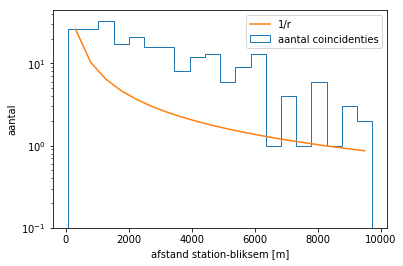

In [10]:
n, _, _ = hist(distances, bins, histtype='step', log=True)
y = y / y[0] * n[0]
plot(x,y)
legend(['1/r', 'aantal coincidenties'])
xlabel('afstand station-bliksem [m]')
ylabel('aantal')
savefig('hist_aantal_en_plot_1_r_log.png', dpi=200)


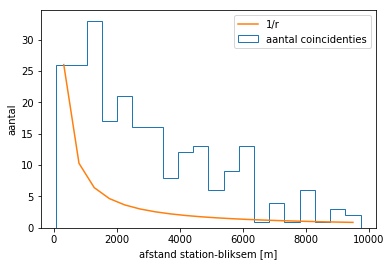

In [11]:
n, _, _ = hist(distances, bins, histtype='step')
plot(x,y)
legend(['1/r', 'aantal coincidenties'])
xlabel('afstand station-bliksem [m]')
ylabel('aantal')
savefig('hist_aantal_en_plot_1_r.png', dpi=200)


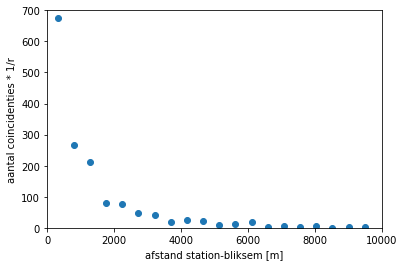

In [12]:
scatter(x, n*y)
ylabel('aantal coincidenties * 1/r')
xlabel('afstand station-bliksem [m]')
xlim([0, 10000])
ylim([0, 700])
savefig('afstand_aantal.png', dpi=200)


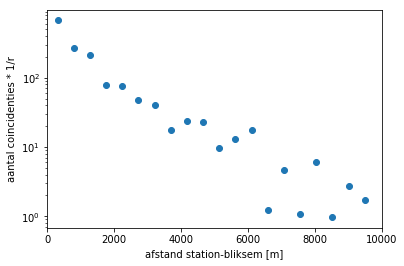

In [13]:
ax = gca()
ax.scatter(x, n*y)
ax.set_yscale('log')
ylabel('aantal coincidenties * 1/r')
xlabel('afstand station-bliksem [m]')
xlim([0, 10000])
savefig('afstand_aantal_lin_log.png', dpi=200)

In [14]:
from scipy.optimize import curve_fit

In [25]:
def fit_func1(r, C):
    return C/r

def fit_func2(r, C):
    return C/r**2




In [27]:
popt, pcov = curve_fit(fit_func1, x, n*y)
C1 = popt[0]
popt, pcov = curve_fit(fit_func2, x, n*y)
C2 = popt[0]
print(C1, C2)

207801.840078 71158075.262


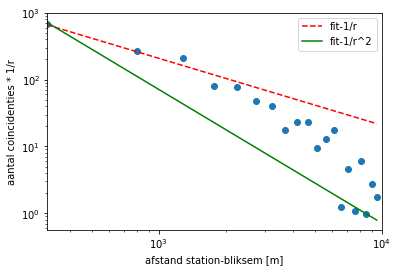

In [35]:
ax = gca()
ax.scatter(x, n*y)
ax.plot(x, fit_func1(x, C1), 'r--', label='fit-1/r')
ax.plot(x, fit_func2(x, C2), 'g-', label='fit-1/r^2')
ax.set_xscale('log')
ax.set_yscale('log')
ylabel('aantal coincidenties * 1/r')
xlabel('afstand station-bliksem [m]')
xlim([0, 10000])
legend()
savefig('afstand_aantal_log_log.png', dpi=200)
